In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('data.csv', delimiter = ',')
data = pd.DataFrame(data)

data[2] = data[1]
data[1] = data[0]**2
data[3] = data[2]
data[2] = 1 # for c



In [3]:
data = data.values
data.shape

(100, 4)

In [4]:
def cost(points, m ):
    M = len(points)
    x =  points[:,:-1]
    y= points[:,-1]
    tot_cost = ((1/(2*M))*((y-(m*x).sum())**2)).sum()
    return tot_cost



def step_gradient(points, lr, m):
    m_slope= np.zeros(shape = points[:,:-1].shape[1]) 
    
    features = points [:,:-1].shape[1]
    M = len(points)
    for i in range(M):
        x = points[i,:-1]
        y = points[i,-1]
        
        for j in range(features):
            m_slope[j] += (-1/M)*(y-((m*x).sum()))*x[j]

    new_m = m - lr*m_slope
    return new_m
    

    
def gd(points, lr , num):
    m = np.zeros(shape = points[:,:-1].shape[1])
    
    for i in range(num):
        m = step_gradient(points, lr , m )
        #print(i, "Cost: ", cost(points,m))
        plt.scatter(i,cost(points,m))
    plt.xlabel('Number of Features')
    plt.ylabel('Cost Function Value')
    plt.show()
    
    return m


    
   
    

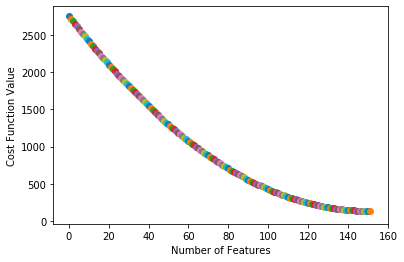

In [5]:
lr = 0.00000000001
num = 152
m = gd(data, lr, num)